In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Final_df.csv')
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,labels
0,1556732,27015,1,1,Skinny Margarita,6,2,other,other,145935,prior,7,0,13,8.0,1,7.833333,0.222222,1
1,870210,29615,1,0,"Bread, Country Buttermilk",112,3,bread,bakery,166045,prior,2,5,8,8.0,1,6.248540,0.011806,3
2,2909661,22124,10,1,Total 0% Raspberry Yogurt,120,16,yogurt,dairy eggs,79838,prior,19,4,14,6.0,1,7.531227,0.003755,5
3,281417,27313,13,1,Light Mozarella String Cheese,21,16,packaged cheese,dairy eggs,77516,prior,3,2,13,16.0,1,8.212429,0.005096,3
4,1975712,24964,5,1,Organic Garlic,83,4,fresh vegetables,produce,182059,prior,10,1,13,7.0,1,8.769043,0.004001,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81914 entries, 0 to 81913
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 81914 non-null  int64  
 1   product_id               81914 non-null  int64  
 2   add_to_cart_order        81914 non-null  int64  
 3   reordered                81914 non-null  int64  
 4   product_name             81914 non-null  object 
 5   aisle_id                 81914 non-null  int64  
 6   department_id            81914 non-null  int64  
 7   aisle                    81914 non-null  object 
 8   department               81914 non-null  object 
 9   user_id                  81914 non-null  int64  
 10  eval_set                 81914 non-null  object 
 11  order_number             81914 non-null  int64  
 12  order_dow                81914 non-null  int64  
 13  order_hour_of_day        81914 non-null  int64  
 14  days_since_prior_order

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df=df.sort_values(by=['user_id'])

In [6]:
#Feature Engineering

In [7]:
orders_grouped=df.groupby(by=['order_id'],as_index=False).agg({'product_id':'count'})
orders_grouped

,order_id,product_id
0,20,2
1,161,5
2,371,4
3,537,3
4,860,12
...,...,...
15386,3420105,6
15387,3420580,3
15388,3420660,7
15389,3420749,17


In [8]:
orders_grouped.rename(columns={'product_id':'order_size'},inplace=True)
orders_grouped

,order_id,order_size
0,20,2
1,161,5
2,371,4
3,537,3
4,860,12
...,...,...
15386,3420105,6
15387,3420580,3
15388,3420660,7
15389,3420749,17


In [9]:
df=pd.merge(df,orders_grouped,how='left',on=['order_id'])
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,labels,order_size
0,2438150,15680,1,0,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,prior,1,3,10,0.0,1,3.909149,0.100000,3,1
1,77613,15680,1,1,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,prior,2,3,22,7.0,1,3.909149,0.100000,3,1
2,1332290,5552,2,1,Toasted Almond Gelato,37,1,ice cream ice,frozen,131,prior,5,2,11,16.0,1,9.212743,0.035461,0,4
3,380942,22724,3,1,Family Size Macaroni & Cheese,38,1,frozen meals,frozen,131,prior,9,3,10,15.0,1,7.983402,0.171548,0,5
4,1992658,19051,3,0,"Pita Chips, Simply Naked, Party Size",107,19,chips pretzels,snacks,131,prior,7,6,11,28.0,1,9.343011,0.013200,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,1457722,32931,1,0,Egg Challah Rolls,43,3,buns rolls,bakery,205788,prior,2,5,12,30.0,1,7.092492,0.004338,0,3
81910,2871941,41148,3,0,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,prior,1,0,10,0.0,1,6.225715,0.000715,0,2
81911,704020,41148,1,1,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,prior,5,1,10,30.0,1,6.225715,0.000715,0,2
81912,579774,25745,2,1,Oreo Ice Cream Sandwiches,37,1,ice cream ice,frozen,205788,prior,3,0,10,30.0,1,8.078975,0.004338,0,1


In [10]:
df['cart_priority'] = 1 - df['add_to_cart_order']/(df['order_size']+1)
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,...,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,labels,order_size,cart_priority
0,2438150,15680,1,0,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,...,1,3,10,0.0,1,3.909149,0.100000,3,1,0.500000
1,77613,15680,1,1,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,...,2,3,22,7.0,1,3.909149,0.100000,3,1,0.500000
2,1332290,5552,2,1,Toasted Almond Gelato,37,1,ice cream ice,frozen,131,...,5,2,11,16.0,1,9.212743,0.035461,0,4,0.600000
3,380942,22724,3,1,Family Size Macaroni & Cheese,38,1,frozen meals,frozen,131,...,9,3,10,15.0,1,7.983402,0.171548,0,5,0.500000
4,1992658,19051,3,0,"Pita Chips, Simply Naked, Party Size",107,19,chips pretzels,snacks,131,...,7,6,11,28.0,1,9.343011,0.013200,0,3,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,1457722,32931,1,0,Egg Challah Rolls,43,3,buns rolls,bakery,205788,...,2,5,12,30.0,1,7.092492,0.004338,0,3,0.750000
81910,2871941,41148,3,0,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,...,1,0,10,0.0,1,6.225715,0.000715,0,2,0.000000
81911,704020,41148,1,1,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,...,5,1,10,30.0,1,6.225715,0.000715,0,2,0.666667
81912,579774,25745,2,1,Oreo Ice Cream Sandwiches,37,1,ice cream ice,frozen,205788,...,3,0,10,30.0,1,8.078975,0.004338,0,1,0.000000


In [11]:
avg_sizes = df[['user_id','order_size']].groupby(['user_id']).mean().reset_index()
avg_sizes.rename(columns={"order_size":"avg_order_size"}, inplace=True)
avg_sizes.head()

,user_id,avg_order_size
0,113,1.000000
1,131,4.315789
2,421,4.555556
3,519,2.230769
4,558,7.689189


In [12]:
df=pd.merge(df,avg_sizes,on=['user_id'],how='left')
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,...,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,labels,order_size,cart_priority,avg_order_size
0,2438150,15680,1,0,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,...,3,10,0.0,1,3.909149,0.100000,3,1,0.500000,1.000000
1,77613,15680,1,1,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,...,3,22,7.0,1,3.909149,0.100000,3,1,0.500000,1.000000
2,1332290,5552,2,1,Toasted Almond Gelato,37,1,ice cream ice,frozen,131,...,2,11,16.0,1,9.212743,0.035461,0,4,0.600000,4.315789
3,380942,22724,3,1,Family Size Macaroni & Cheese,38,1,frozen meals,frozen,131,...,3,10,15.0,1,7.983402,0.171548,0,5,0.500000,4.315789
4,1992658,19051,3,0,"Pita Chips, Simply Naked, Party Size",107,19,chips pretzels,snacks,131,...,6,11,28.0,1,9.343011,0.013200,0,3,0.250000,4.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,1457722,32931,1,0,Egg Challah Rolls,43,3,buns rolls,bakery,205788,...,5,12,30.0,1,7.092492,0.004338,0,3,0.750000,2.111111
81910,2871941,41148,3,0,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,...,0,10,0.0,1,6.225715,0.000715,0,2,0.000000,2.111111
81911,704020,41148,1,1,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,...,1,10,30.0,1,6.225715,0.000715,0,2,0.666667,2.111111
81912,579774,25745,2,1,Oreo Ice Cream Sandwiches,37,1,ice cream ice,frozen,205788,...,0,10,30.0,1,8.078975,0.004338,0,1,0.000000,2.111111


In [13]:
users=df.groupby(by=['user_id'],as_index=False).agg({'days_since_prior_order':'mean'})
users.rename(columns={'days_since_prior_order':'avg_interval_between_2_orders'},inplace=True)
users

,user_id,avg_interval_between_2_orders
0,113,3.500000
1,131,17.157895
2,421,20.888889
3,519,17.230769
4,558,7.587838
...,...,...
995,204775,24.875000
996,204955,20.600000
997,205017,4.200000
998,205316,21.428571


In [14]:
df=pd.merge(df,users,on=['user_id'],how='left')
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,...,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,labels,order_size,cart_priority,avg_order_size,avg_interval_between_2_orders
0,2438150,15680,1,0,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,...,10,0.0,1,3.909149,0.100000,3,1,0.500000,1.000000,3.500000
1,77613,15680,1,1,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,...,22,7.0,1,3.909149,0.100000,3,1,0.500000,1.000000,3.500000
2,1332290,5552,2,1,Toasted Almond Gelato,37,1,ice cream ice,frozen,131,...,11,16.0,1,9.212743,0.035461,0,4,0.600000,4.315789,17.157895
3,380942,22724,3,1,Family Size Macaroni & Cheese,38,1,frozen meals,frozen,131,...,10,15.0,1,7.983402,0.171548,0,5,0.500000,4.315789,17.157895
4,1992658,19051,3,0,"Pita Chips, Simply Naked, Party Size",107,19,chips pretzels,snacks,131,...,11,28.0,1,9.343011,0.013200,0,3,0.250000,4.315789,17.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,1457722,32931,1,0,Egg Challah Rolls,43,3,buns rolls,bakery,205788,...,12,30.0,1,7.092492,0.004338,0,3,0.750000,2.111111,20.555556
81910,2871941,41148,3,0,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,...,10,0.0,1,6.225715,0.000715,0,2,0.000000,2.111111,20.555556
81911,704020,41148,1,1,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,...,10,30.0,1,6.225715,0.000715,0,2,0.666667,2.111111,20.555556
81912,579774,25745,2,1,Oreo Ice Cream Sandwiches,37,1,ice cream ice,frozen,205788,...,10,30.0,1,8.078975,0.004338,0,1,0.000000,2.111111,20.555556


In [15]:
products=df.groupby(by=['product_id'],as_index=False).agg({'reordered':'sum','product_name':'count'})
products

,product_id,reordered,product_name
0,1,2,4
1,3,6,6
2,8,0,1
3,10,2,2
4,11,2,3
...,...,...,...
12048,49675,0,1
12049,49678,1,3
12050,49680,0,1
12051,49683,134,188


In [16]:
products.rename(columns={'reordered':'product_reordered','product_name':'product_orders'},inplace=True)
products

,product_id,product_reordered,product_orders
0,1,2,4
1,3,6,6
2,8,0,1
3,10,2,2
4,11,2,3
...,...,...,...
12048,49675,0,1
12049,49678,1,3
12050,49680,0,1
12051,49683,134,188


In [17]:
products['product_reorder_ratio']=products['product_reordered']/products['product_orders']
products

,product_id,product_reordered,product_orders,product_reorder_ratio
0,1,2,4,0.500000
1,3,6,6,1.000000
2,8,0,1,0.000000
3,10,2,2,1.000000
4,11,2,3,0.666667
...,...,...,...,...
12048,49675,0,1,0.000000
12049,49678,1,3,0.333333
12050,49680,0,1,0.000000
12051,49683,134,188,0.712766


In [18]:
products=products[['product_id','product_reorder_ratio']]
products

,product_id,product_reorder_ratio
0,1,0.500000
1,3,1.000000
2,8,0.000000
3,10,1.000000
4,11,0.666667
...,...,...
12048,49675,0.000000
12049,49678,0.333333
12050,49680,0.000000
12051,49683,0.712766


In [19]:
df=pd.merge(df,products,on=['product_id'],how='left')
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,...,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,labels,order_size,cart_priority,avg_order_size,avg_interval_between_2_orders,product_reorder_ratio
0,2438150,15680,1,0,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,...,0.0,1,3.909149,0.100000,3,1,0.500000,1.000000,3.500000,0.714286
1,77613,15680,1,1,Red Plastic Cups,111,17,plates bowls cups flatware,household,113,...,7.0,1,3.909149,0.100000,3,1,0.500000,1.000000,3.500000,0.714286
2,1332290,5552,2,1,Toasted Almond Gelato,37,1,ice cream ice,frozen,131,...,16.0,1,9.212743,0.035461,0,4,0.600000,4.315789,17.157895,0.200000
3,380942,22724,3,1,Family Size Macaroni & Cheese,38,1,frozen meals,frozen,131,...,15.0,1,7.983402,0.171548,0,5,0.500000,4.315789,17.157895,1.000000
4,1992658,19051,3,0,"Pita Chips, Simply Naked, Party Size",107,19,chips pretzels,snacks,131,...,28.0,1,9.343011,0.013200,0,3,0.250000,4.315789,17.157895,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,1457722,32931,1,0,Egg Challah Rolls,43,3,buns rolls,bakery,205788,...,30.0,1,7.092492,0.004338,0,3,0.750000,2.111111,20.555556,0.000000
81910,2871941,41148,3,0,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,...,0.0,1,6.225715,0.000715,0,2,0.000000,2.111111,20.555556,0.500000
81911,704020,41148,1,1,Hard Cooked Eggs,86,16,eggs,dairy eggs,205788,...,30.0,1,6.225715,0.000715,0,2,0.666667,2.111111,20.555556,0.500000
81912,579774,25745,2,1,Oreo Ice Cream Sandwiches,37,1,ice cream ice,frozen,205788,...,30.0,1,8.078975,0.004338,0,1,0.000000,2.111111,20.555556,0.400000


In [20]:
df['order_number']=df.groupby(by=['user_id'])['order_id'].rank()
df['order_number']

0         2.0
1         1.0
2        24.5
3        16.0
4        32.0
         ... 
81909     6.0
81910     8.5
81911     3.5
81912     2.0
81913     6.0
Name: order_number, Length: 81914, dtype: float64

In [21]:
lastProdOrders = df.groupby(["user_id","product_id"]).agg({'order_number':'max'}).reset_index()
lastProdOrders = lastProdOrders.merge(df, on=['user_id','product_id', 'order_number'], how='left')
print(len(lastProdOrders))
lastProdOrders.head()

42790


,user_id,product_id,order_number,order_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,...,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,labels,order_size,cart_priority,avg_order_size,avg_interval_between_2_orders,product_reorder_ratio
0,113,15680,2.0,2438150,1,0,Red Plastic Cups,111,17,plates bowls cups flatware,...,0.0,1,3.909149,0.100000,3,1,0.500000,1.000000,3.500000,0.714286
1,131,890,7.0,122158,4,1,Organic Diced Tomatoes,81,15,canned jarred vegetables,...,11.0,1,9.728963,0.002727,0,5,0.333333,4.315789,17.157895,0.591549
2,131,5552,36.0,2870337,9,0,Toasted Almond Gelato,37,1,ice cream ice,...,30.0,1,9.212743,0.035461,0,5,-0.500000,4.315789,17.157895,0.200000
3,131,7751,24.5,1332290,4,0,Tomato Ketchup,72,13,condiments,...,16.0,1,9.620676,0.135401,0,4,0.200000,4.315789,17.157895,0.200000
4,131,11913,28.5,1361399,6,1,Shelled Pistachios,117,19,nuts seeds dried fruit,...,24.0,1,8.503848,0.378882,0,4,-0.200000,4.315789,17.157895,0.200000


In [22]:
lastProdOrders.shape

(42790, 24)

In [23]:
features=pd.get_dummies(lastProdOrders,columns=['department_id','aisle_id'])
features

,user_id,product_id,order_number,order_id,add_to_cart_order,reordered,product_name,aisle,department,eval_set,...,aisle_id_125,aisle_id_126,aisle_id_127,aisle_id_128,aisle_id_129,aisle_id_130,aisle_id_131,aisle_id_132,aisle_id_133,aisle_id_134
0,113,15680,2.0,2438150,1,0,Red Plastic Cups,plates bowls cups flatware,household,prior,...,0,0,0,0,0,0,0,0,0,0
1,131,890,7.0,122158,4,1,Organic Diced Tomatoes,canned jarred vegetables,canned goods,prior,...,0,0,0,0,0,0,0,0,0,0
2,131,5552,36.0,2870337,9,0,Toasted Almond Gelato,ice cream ice,frozen,prior,...,0,0,0,0,0,0,0,0,0,0
3,131,7751,24.5,1332290,4,0,Tomato Ketchup,condiments,pantry,prior,...,0,0,0,0,0,0,0,0,0,0
4,131,11913,28.5,1361399,6,1,Shelled Pistachios,nuts seeds dried fruit,snacks,prior,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42785,205788,23106,6.0,1457722,4,1,Pomegranate on the Bottom Non-Fat Greek Yogurt,yogurt,dairy eggs,prior,...,0,0,0,0,0,0,0,0,0,0
42786,205788,25745,3.5,704020,3,1,Oreo Ice Cream Sandwiches,ice cream ice,frozen,prior,...,0,0,0,0,0,0,0,0,0,0
42787,205788,32931,6.0,1457722,1,0,Egg Challah Rolls,buns rolls,bakery,prior,...,0,0,0,0,0,0,0,0,0,0
42788,205788,39764,8.5,2871941,1,0,Fresh and Clean 2 in 1 Shampoo,hair care,personal care,prior,...,0,0,0,0,0,0,0,0,0,0


In [24]:
features.drop(columns=['aisle','department','eval_set','product_name','reorder_ratio','COUNTER','add_to_cart_order'],inplace=True)

In [25]:
X=features.drop(columns=['reordered','order_id','user_id','product_id'])
X

,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_ratio,labels,order_size,cart_priority,avg_order_size,avg_interval_between_2_orders,...,aisle_id_125,aisle_id_126,aisle_id_127,aisle_id_128,aisle_id_129,aisle_id_130,aisle_id_131,aisle_id_132,aisle_id_133,aisle_id_134
0,2.0,3,10,0.0,3.909149,3,1,0.500000,1.000000,3.500000,...,0,0,0,0,0,0,0,0,0,0
1,7.0,6,9,11.0,9.728963,0,5,0.333333,4.315789,17.157895,...,0,0,0,0,0,0,0,0,0,0
2,36.0,3,10,30.0,9.212743,0,5,-0.500000,4.315789,17.157895,...,0,0,0,0,0,0,0,0,0,0
3,24.5,2,11,16.0,9.620676,0,4,0.200000,4.315789,17.157895,...,0,0,0,0,0,0,0,0,0,0
4,28.5,2,8,24.0,8.503848,0,4,-0.200000,4.315789,17.157895,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42785,6.0,5,12,30.0,9.710752,0,3,0.000000,2.111111,20.555556,...,0,0,0,0,0,0,0,0,0,0
42786,3.5,1,10,30.0,8.078975,0,2,0.000000,2.111111,20.555556,...,0,0,0,0,0,0,0,0,0,0
42787,6.0,5,12,30.0,7.092492,0,3,0.750000,2.111111,20.555556,...,0,0,0,0,0,0,0,0,0,0
42788,8.5,0,10,0.0,11.101942,0,2,0.666667,2.111111,20.555556,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y=features['reordered']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [28]:
#grid search logistic Regression

In [29]:
param_grid = {
     'penalty' : ['l1', 'l2'],
     'C' : [0.001,0.01,0.1,1.0,10,100,1000]}

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs=-1, cv=3,verbose=2)
result = search.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


C:\Users\dheer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.70347734        nan 0.72494694        nan 0.72578828
        nan 0.72525835        nan 0.7256325         nan 0.73117901
        nan 0.72756441]
  warnings.warn(


Best Score: 0.7311790143843316
Best Hyperparameters: {'C': 100, 'penalty': 'l2'}


C:\Users\dheer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.metrics import accuracy_score
metrics_df=pd.DataFrame()
log_preds=search.predict(x_test)
log_preds_train=search.predict(x_train)
accuracy_log=accuracy_score(log_preds,y_test)
accuracy_train=accuracy_score(log_preds_train,y_train)
metrics_df['Model']='logistic Regression'
metrics_df['train_accuracy']=accuracy_train
metrics_df['test_accuracy']=accuracy_log

In [32]:
accuracy_log

0.7246214245653393

In [33]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, log_preds, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.77      0.81      0.79      6779
     class 1       0.64      0.57      0.60      3919

    accuracy                           0.72     10698
   macro avg       0.70      0.69      0.70     10698
weighted avg       0.72      0.72      0.72     10698



## Roc Curve

In [34]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [35]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = search.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.799


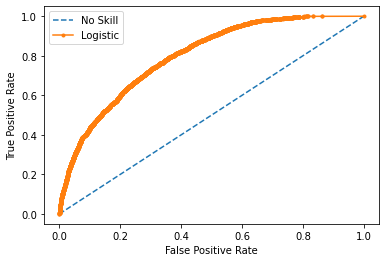

In [36]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [37]:
!pip install xgboost

In [38]:
# grid search xgb
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [39]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, nthread=-1)

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=42)

In [41]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\dheer\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:04:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000141BF234A50>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.05,
                                           max_delta_step=None, max_depth=None,
                                           mi...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
  

In [42]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=1.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, nthread=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [43]:
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 10,
 'max_depth': 4,
 'gamma': 1.5,
 'colsample_bytree': 0.6}

In [44]:
#fitting the model with best params to find feature importance
import xgboost as xgb
xgb1 = xgb.XGBClassifier(n_estimators=600, learning_rate=0.05, nthread=-1,subsample=0.6,min_child_weight=10,gamma=1,colsample_bytree=0.6)

In [45]:
xgb1.fit(x_train,y_train)

[21:04:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=16, nthread=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

<Figure size 1440x720 with 0 Axes>

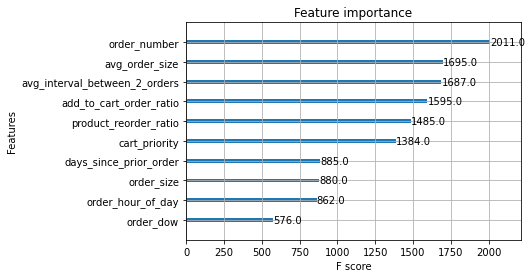

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
xgb=xgb.plot_importance(xgb1, max_num_features=10)

In [48]:
xgb_pred=random_search.predict(x_test)
xgb_train=random_search.predict(x_train)
accuracy_xgb=accuracy_score(xgb_pred,y_test)
accuracy_train=accuracy_score(xgb_train,y_train)

In [49]:
accuracy_xgb

0.7594877547205086

In [50]:

xgb_probs = random_search.predict_proba(x_test)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, xgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.844


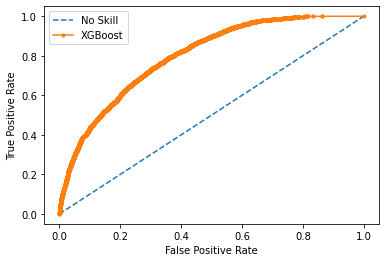

In [51]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()